# Proyek Klasifikasi Gambar: **Dataset klasifikasi gambar hewan**
- **Nama:** Elisa Ramadanti
- **Email:** elisaramadanti11@gmail.com
- **ID Dicoding:** B244016E

## **Tentang Dataset**

Dataset yang digunakan diperoleh dari *Kaggle* dengan nama "**dataset klasifikasi gambar hewan"** dan terdiri dari 15.000 gambar. Dataset ini terbagi ke dalam dua folder utama, yaitu training_set untuk data pelatihan dan test_set untuk data pengujian, yang masing-masing berisi gambar dari tiga kelas berbeda: cats (kucing), dogs (anjing), dan tigers (harimau).

## **Mengimpor Library yang Dibutuhkan**

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 21.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
import os
import shutil
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

**Mengunduh dan Mengekstrak Dataset dari Kaggle**

In [2]:
import kagglehub
path = kagglehub.dataset_download("nicopalv/dataset-klasifikasi-gambar-hewan")
print("Path to dataset files:", path)

100%|██████████| 436M/436M [00:23<00:00, 19.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nicopalv/dataset-klasifikasi-gambar-hewan/versions/1


In [3]:
# Ekstrak dataset jika dalam format .zip
zip_path = "/root/.cache/kagglehub/datasets/nicopalv/dataset-klasifikasi-gambar-hewan/versions/1/dataset.zip"
extracted_path = "/root/.cache/kagglehub/datasets/nicopalv/dataset-klasifikasi-gambar-hewan/versions/1"

if not os.path.exists(extracted_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_path)
    print("Dataset extracted successfully.")
else:
    print("Dataset already extracted.")

Dataset already extracted.


In [4]:
# Path ke folder dataset
data_dir = os.path.join(extracted_path, "dataset")

# Verifikasi struktur dataset
print("Contents of dataset directory:")
for item in os.listdir(data_dir):
    print(item)

Contents of dataset directory:
training_set
test_set


In [5]:
train_dir = os.path.join(data_dir, "training_set")
test_dir = os.path.join(data_dir, "test_set")

In [6]:
# Fungsi untuk melihat jumlah citra dan ukuran resolusi
def print_images_resolution(directory):
    unique_sizes = set()
    total_images = 0

    print(f"\n📊 **Analisis Dataset di {directory}**")
    print("=====================================")

    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            image_files = os.listdir(subdir_path)
            num_images = len(image_files)
            print(f"📂 {subdir}: {num_images} gambar")
            total_images += num_images

            for img_file in image_files:
                img_path = os.path.join(subdir_path, img_file)
                with Image.open(img_path) as img:
                    unique_sizes.add(img.size)

            for size in unique_sizes:
                print(f"   📏 Resolusi: {size}")
            print("---------------")

    print(f"\n📌 **Total gambar: {total_images}**")

# Menampilkan jumlah gambar dan resolusinya di training & test set
print_images_resolution(train_dir)
print_images_resolution(test_dir)

Streaming output truncated to the last 5000 lines.
   📏 Resolusi: (440, 459)
   📏 Resolusi: (431, 410)
   📏 Resolusi: (379, 220)
   📏 Resolusi: (893, 441)
   📏 Resolusi: (134, 160)
   📏 Resolusi: (1374, 485)
   📏 Resolusi: (254, 225)
   📏 Resolusi: (400, 279)
   📏 Resolusi: (303, 346)
   📏 Resolusi: (638, 336)
   📏 Resolusi: (349, 233)
   📏 Resolusi: (574, 580)
   📏 Resolusi: (425, 457)
   📏 Resolusi: (516, 575)
   📏 Resolusi: (249, 231)
   📏 Resolusi: (532, 290)
   📏 Resolusi: (187, 292)
   📏 Resolusi: (261, 241)
   📏 Resolusi: (240, 303)
   📏 Resolusi: (399, 296)
   📏 Resolusi: (384, 698)
   📏 Resolusi: (681, 396)
   📏 Resolusi: (497, 346)
   📏 Resolusi: (376, 285)
   📏 Resolusi: (395, 298)
   📏 Resolusi: (161, 131)
   📏 Resolusi: (496, 350)
   📏 Resolusi: (499, 355)
   📏 Resolusi: (399, 417)
   📏 Resolusi: (210, 252)
   📏 Resolusi: (1046, 524)
   📏 Resolusi: (471, 293)
   📏 Resolusi: (696, 411)
   📏 Resolusi: (379, 475)
   📏 Resolusi: (272, 349)
   📏 Resolusi: (346, 298)
   📏 Resolu

In [7]:
# Hitung total gambar dalam dataset
total_images = sum([len(files) for r, d, files in os.walk(data_dir)])
print(f"Total images in dataset: {total_images}")

Total images in dataset: 15000


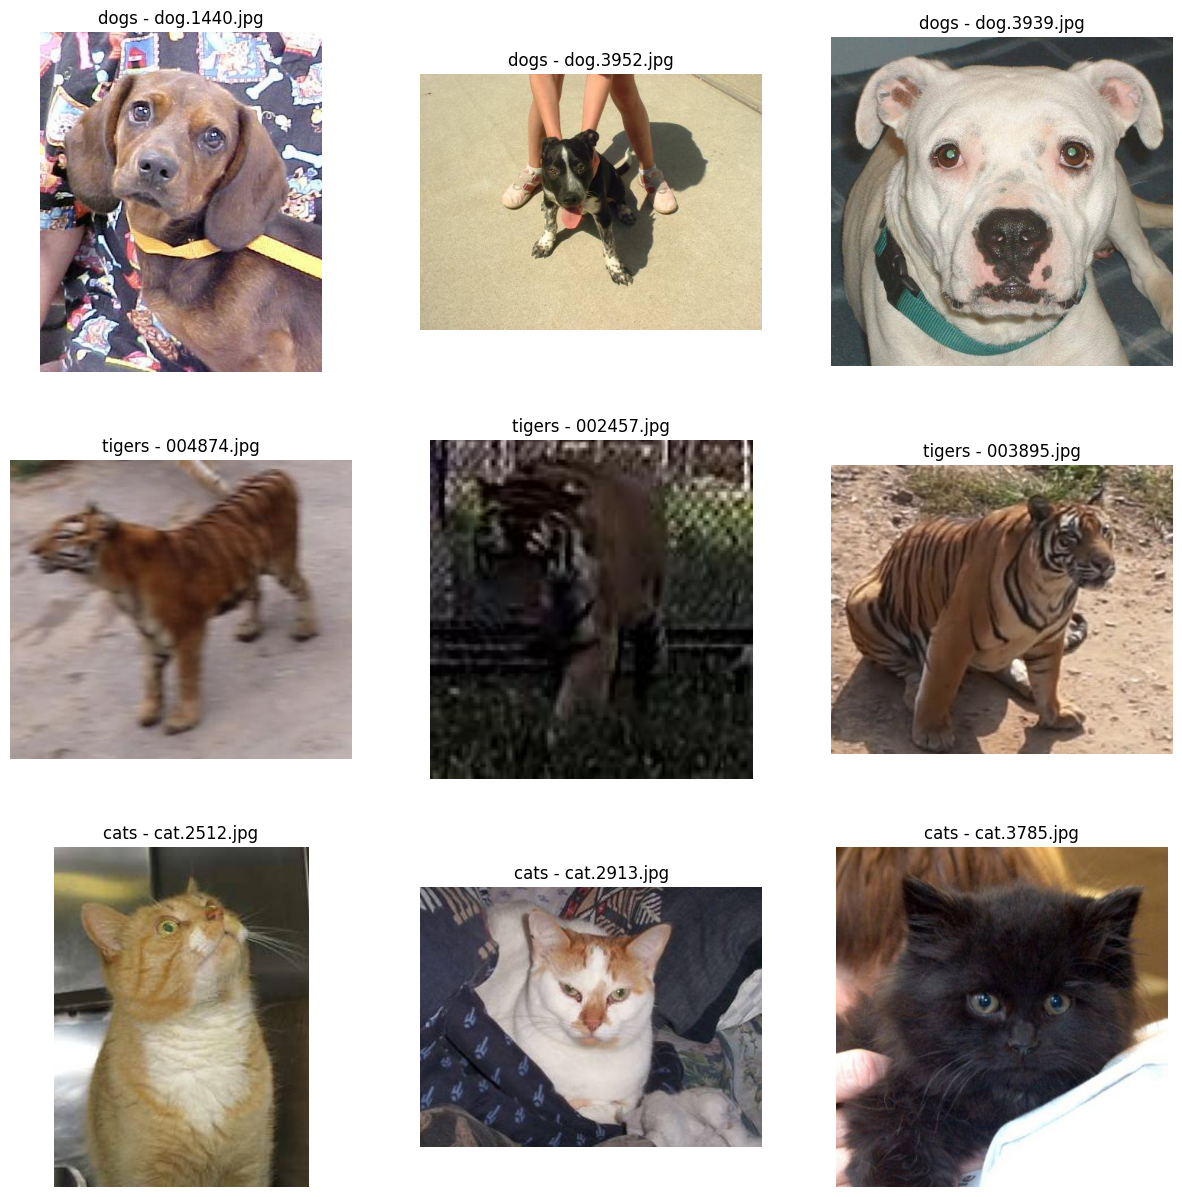

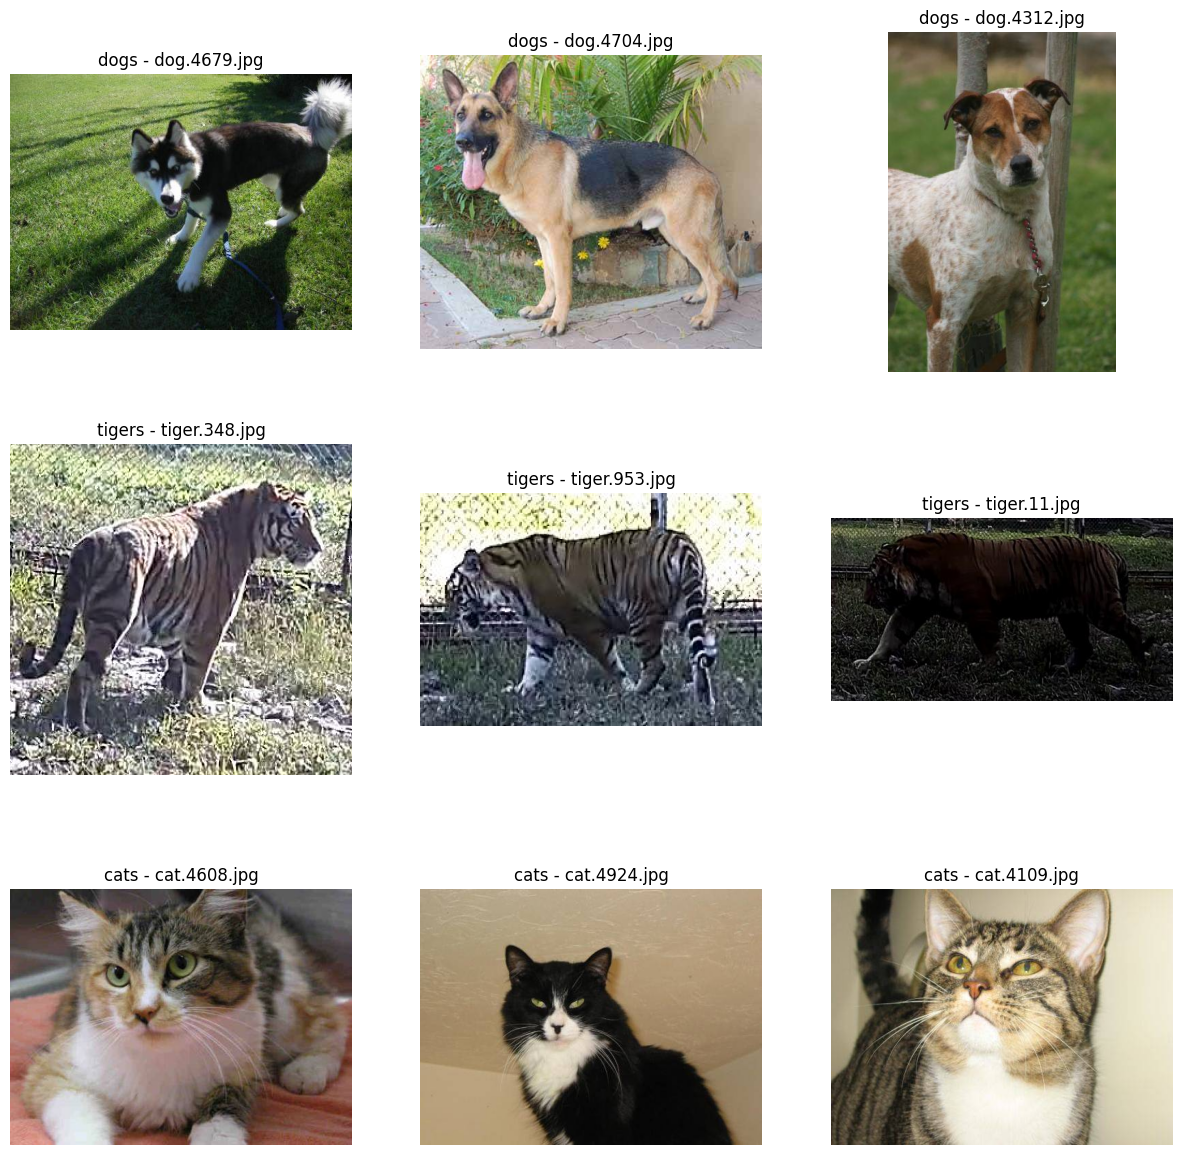

In [8]:
# Fungsi untuk menampilkan gambar secara acak dari folder
def display_sample_images(directory, class_names, num_images=5):
    plt.figure(figsize=(15, 15))

    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        images = os.listdir(class_dir)

        # Pilih beberapa gambar secara acak
        sample_images = np.random.choice(images, num_images, replace=False)

        for j, img_name in enumerate(sample_images):
            img_path = os.path.join(class_dir, img_name)
            img = mpimg.imread(img_path)
            plt.subplot(len(class_names), num_images, i * num_images + j + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'{class_name} - {img_name}')

    plt.show()

# Menampilkan gambar dari training set
class_names = os.listdir(train_dir)  # Nama kelas dari folder training_set
display_sample_images(train_dir, class_names, num_images=3)  # Tampilkan 3 gambar per kelas

# Menampilkan gambar dari test set (opsional)
display_sample_images(test_dir, class_names, num_images=3)  # Tampilkan 3 gambar per kelas


### **Data Preprocessing & Data Loading**

## **Data Preparation**

In [18]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    validation_split=0.2  # Split 80% Train, 20% Validation
)

In [26]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [27]:
# Verifikasi jumlah gambar di folder train dan test
def count_images(directory):
    total_images = 0
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            total_images += len(os.listdir(class_dir))
    return total_images

train_count = count_images(train_dir)
test_count = count_images(test_dir)
total_count = train_count + test_count

print(f"Total gambar: {total_count}")
print(f"Train set: {train_count} gambar ({train_count / total_count * 100:.2f}%)")
print(f"Test set: {test_count} gambar ({test_count / total_count * 100:.2f}%)")

Total gambar: 15000
Train set: 12000 gambar (80.00%)
Test set: 3000 gambar (20.00%)


## **Modelling**

**Pembangunan Model CNN**

In [28]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.4),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

**Ringkasan Arsitektur Model**

In [29]:
# Model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 36, 36, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 17, 17, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 73984)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │      75,760,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,134,531 (290.43 MB)

 Trainable params: 76,134,531 (290.43 MB)

 Non-trainable params: 0 (0.00 B)

**Kompilasi Model**

In [30]:
# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**Penggunaan Callbacks untuk Optimasi dan Regularisasi Model**

In [32]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)
]

**Melatih Model**

In [33]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=45,
    callbacks=callbacks
)

Epoch 1/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.4415 - loss: 1.0613

375/375 ━━━━━━━━━━━━━━━━━━━━ 130s 320ms/step - accuracy: 0.4417 - loss: 1.0610 - val_accuracy: 0.6063 - val_loss: 0.8153 - learning_rate: 1.0000e-04
Epoch 2/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.6289 - loss: 0.7434

375/375 ━━━━━━━━━━━━━━━━━━━━ 118s 313ms/step - accuracy: 0.6289 - loss: 0.7432 - val_accuracy: 0.6187 - val_loss: 0.7531 - learning_rate: 1.0000e-04
Epoch 3/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.7047 - loss: 0.6176

375/375 ━━━━━━━━━━━━━━━━━━━━ 158s 422ms/step - accuracy: 0.7048 - loss: 0.6176 - val_accuracy: 0.6630 - val_loss: 0.6818 - learning_rate: 1.0000e-04
Epoch 4/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.7206 - loss: 0.5727

375/375 ━━━━━━━━━━━━━━━━━━━━ 166s 326ms/step - accuracy: 0.7206 - loss: 0.5726 - val_accuracy: 0.7033 - val_loss: 0.6165 - learning_rate: 1.0000e-04
Epoch 5/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.7366 - loss: 0.5376

375/375 ━━━━━━━━━━━━━━━━━━━━ 150s 346ms/step - accuracy: 0.7366 - loss: 0.5376 - val_accuracy: 0.7343 - val_loss: 0.5770 - learning_rate: 1.0000e-04
Epoch 6/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.7591 - loss: 0.4981

375/375 ━━━━━━━━━━━━━━━━━━━━ 122s 326ms/step - accuracy: 0.7591 - loss: 0.4980 - val_accuracy: 0.7500 - val_loss: 0.5203 - learning_rate: 1.0000e-04
Epoch 7/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.7767 - loss: 0.4794

375/375 ━━━━━━━━━━━━━━━━━━━━ 126s 335ms/step - accuracy: 0.7767 - loss: 0.4794 - val_accuracy: 0.7677 - val_loss: 0.4788 - learning_rate: 1.0000e-04
Epoch 8/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.7680 - loss: 0.4792

375/375 ━━━━━━━━━━━━━━━━━━━━ 120s 321ms/step - accuracy: 0.7680 - loss: 0.4791 - val_accuracy: 0.7807 - val_loss: 0.4391 - learning_rate: 1.0000e-04
Epoch 9/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 106s 283ms/step - accuracy: 0.7708 - loss: 0.4788 - val_accuracy: 0.7377 - val_loss: 0.5756 - learning_rate: 1.0000e-04
Epoch 10/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 106s 282ms/step - accuracy: 0.7968 - loss: 0.4289 - val_accuracy: 0.7713 - val_loss: 0.4860 - learning_rate: 1.0000e-04
Epoch 11/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.7931 - loss: 0.4385

375/375 ━━━━━━━━━━━━━━━━━━━━ 163s 435ms/step - accuracy: 0.7931 - loss: 0.4385 - val_accuracy: 0.7967 - val_loss: 0.4294 - learning_rate: 1.0000e-04
Epoch 12/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.8074 - loss: 0.4096

375/375 ━━━━━━━━━━━━━━━━━━━━ 137s 366ms/step - accuracy: 0.8074 - loss: 0.4096 - val_accuracy: 0.7987 - val_loss: 0.4222 - learning_rate: 1.0000e-04
Epoch 13/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.8118 - loss: 0.4060

375/375 ━━━━━━━━━━━━━━━━━━━━ 118s 315ms/step - accuracy: 0.8118 - loss: 0.4060 - val_accuracy: 0.8273 - val_loss: 0.3793 - learning_rate: 1.0000e-04
Epoch 14/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 106s 283ms/step - accuracy: 0.8074 - loss: 0.4103 - val_accuracy: 0.8083 - val_loss: 0.4147 - learning_rate: 1.0000e-04
Epoch 15/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 104s 276ms/step - accuracy: 0.8230 - loss: 0.3802 - val_accuracy: 0.8043 - val_loss: 0.3928 - learning_rate: 1.0000e-04
Epoch 16/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.8234 - loss: 0.3863

375/375 ━━━━━━━━━━━━━━━━━━━━ 154s 412ms/step - accuracy: 0.8234 - loss: 0.3863 - val_accuracy: 0.8343 - val_loss: 0.3684 - learning_rate: 1.0000e-04
Epoch 17/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 104s 278ms/step - accuracy: 0.8321 - loss: 0.3752 - val_accuracy: 0.8133 - val_loss: 0.3927 - learning_rate: 1.0000e-04
Epoch 18/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 105s 280ms/step - accuracy: 0.8335 - loss: 0.3716 - val_accuracy: 0.8177 - val_loss: 0.4039 - learning_rate: 1.0000e-04
Epoch 19/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.8297 - loss: 0.3660

375/375 ━━━━━━━━━━━━━━━━━━━━ 120s 319ms/step - accuracy: 0.8297 - loss: 0.3659 - val_accuracy: 0.8367 - val_loss: 0.3524 - learning_rate: 1.0000e-04
Epoch 20/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 103s 275ms/step - accuracy: 0.8406 - loss: 0.3479 - val_accuracy: 0.8240 - val_loss: 0.3961 - learning_rate: 1.0000e-04
Epoch 21/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 105s 281ms/step - accuracy: 0.8402 - loss: 0.3466 - val_accuracy: 0.8453 - val_loss: 0.3563 - learning_rate: 1.0000e-04
Epoch 22/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.8425 - loss: 0.3410

375/375 ━━━━━━━━━━━━━━━━━━━━ 160s 426ms/step - accuracy: 0.8425 - loss: 0.3410 - val_accuracy: 0.8557 - val_loss: 0.3259 - learning_rate: 1.0000e-04
Epoch 23/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 102s 272ms/step - accuracy: 0.8456 - loss: 0.3403 - val_accuracy: 0.8407 - val_loss: 0.3367 - learning_rate: 1.0000e-04
Epoch 24/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 103s 273ms/step - accuracy: 0.8466 - loss: 0.3354 - val_accuracy: 0.8210 - val_loss: 0.3722 - learning_rate: 1.0000e-04
Epoch 25/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 104s 276ms/step - accuracy: 0.8517 - loss: 0.3334 - val_accuracy: 0.8610 - val_loss: 0.3367 - learning_rate: 1.0000e-04
Epoch 26/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 102s 271ms/step - accuracy: 0.8589 - loss: 0.3133 - val_accuracy: 0.8553 - val_loss: 0.3282 - learning_rate: 1.0000e-05
Epoch 27/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.8726 - loss: 0.2821

375/375 ━━━━━━━━━━━━━━━━━━━━ 125s 335ms/step - accuracy: 0.8726 - loss: 0.2821 - val_accuracy: 0.8503 - val_loss: 0.3237 - learning_rate: 1.0000e-05
Epoch 28/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.8688 - loss: 0.2957

375/375 ━━━━━━━━━━━━━━━━━━━━ 127s 339ms/step - accuracy: 0.8688 - loss: 0.2957 - val_accuracy: 0.8587 - val_loss: 0.3194 - learning_rate: 1.0000e-05
Epoch 29/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.8708 - loss: 0.2968

375/375 ━━━━━━━━━━━━━━━━━━━━ 154s 410ms/step - accuracy: 0.8708 - loss: 0.2968 - val_accuracy: 0.8670 - val_loss: 0.3090 - learning_rate: 1.0000e-05
Epoch 30/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 152s 277ms/step - accuracy: 0.8721 - loss: 0.2861 - val_accuracy: 0.8593 - val_loss: 0.3206 - learning_rate: 1.0000e-05
Epoch 31/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 101s 270ms/step - accuracy: 0.8751 - loss: 0.2863 - val_accuracy: 0.8543 - val_loss: 0.3174 - learning_rate: 1.0000e-05
Epoch 32/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 110s 293ms/step - accuracy: 0.8683 - loss: 0.2903 - val_accuracy: 0.8663 - val_loss: 0.3117 - learning_rate: 1.0000e-05
Epoch 33/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 102s 272ms/step - accuracy: 0.8692 - loss: 0.2918 - val_accuracy: 0.8683 - val_loss: 0.3139 - learning_rate: 1.0000e-06
Epoch 34/45
375/375 ━━━━━━━━━━━━━━━━━━━━ 104s 277ms/step - accuracy: 0.8706 - loss: 0.2888 - val_accuracy: 0.8660 - val_loss: 0.3124 - learning_rate: 1.0000e-06


## **Evaluasi dan Visualisasi**

**Evaluasi Model: Menampilkan Akurasi Pengujian Model**

In [34]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 208ms/step - accuracy: 0.8592 - loss: 0.3214
Test Accuracy: 86.67%


**Menampilkan Akurasi Pelatihan Model**

In [35]:
training_accuracy = history.history['accuracy'][-1]  # Akurasi training terakhir
print(f"Training Accuracy: {training_accuracy * 100:.2f}%")

Training Accuracy: 87.21%


**Visualisasi Akurasi dan Loss Model**

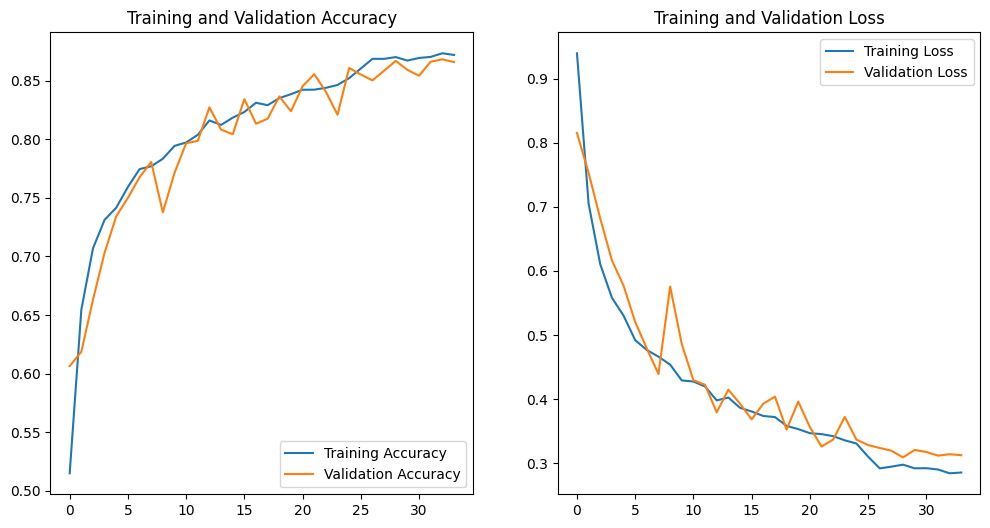

In [36]:
# Plot accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

## **Konversi Model**

**Menyimpan Model dalam SavedModel, TF-Lite, dan TFJS**

In [44]:
# Simpan model dalam format SavedModel untuk deployment
model.export("saved_model")
print("Model saved in SavedModel format.")

# Konversi model ke format TF-Lite
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model")
tflite_model = converter.convert()

# Pastikan folder tflite ada
os.makedirs("tflite", exist_ok=True)

# Simpan file .tflite
with open("tflite/model.tflite", "wb") as f:
    f.write(tflite_model)
print("Model converted to TF-Lite format and saved as model.tflite.")

#Buat file label.txt untuk kelas
class_labels = list(train_generator.class_indices.keys())
with open("tflite/label.txt", "w") as f:
    for label in class_labels:
        f.write(f"{label}\n")
print("Label file saved as label.txt.")

# Konversi model ke format TFJS
os.makedirs("tfjs_model", exist_ok=True)
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    saved_model \
    tfjs_model
print("Model converted to TFJS format and saved in tfjs_model directory.")

Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_28')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  140023188744976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140023188743440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140023188745744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140023188744016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140023188743248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140023188741712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140023188744208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140023188742672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140023188740176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140023188742480: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model saved in Sav

**Requirements.txt**

In [39]:
!pip freeze > requirements.txt
print("Requirements saved to requirements.txt")

Requirements saved to requirements.txt
